# **DESAFIO SQL (LUAN CARLOS CUNHA LOUREIRO DE ALENCAR)**

---




##Primeira parte

###DESCRIÇÃO

Implemente em python um programa que tenha como entradas o arquivo CSV e realize as seguintes tarefas:

1.   Construa uma tabela auxiliar que sumarize o valor vendido por cada vendedor, ordenando do maior para o menor;
2.   Imprima e identifica qual foi o cliente responsável pela venda com maior valor e com menor valor;
3.   Imprima valor médio por Tipo de venda (Serviços, Licenciamento, Produtos)
4.   Imprima o número de vendas realizada por cliente


###IDEIAS DE RESOLUÇÃO

->Como se trata de um arquivo que está em .CSV, decidi utilizar a biblioteca Pandas para me auxiliar na primeira parte, uma vez que o pandas possui diversas ferramentas pra fazer tratamento em DataFrames de modo fácil e com um código limpo de se escrever e visualizar.
Também utilizei NumPy para me auxiliar com o tratamento de números, além do IPython para melhor visualizar as tabelas durante a execução

###Importação das Bibliotecas


In [1]:
from IPython.display import display
import pandas as pd
import numpy as np

### Abrindo arquivo csv


In [2]:
dados = pd.read_csv('/content/drive/My Drive/Desafio_SQL/DB_Teste.csv', sep = ';')
dados

,Cliente,ID,Tipo,Data da Venda,Categoria,Vendedor,Regional,Duração do Contrato (Meses),Equipe,Valor,Unnamed: 10
0,Cliente 1,2017-0022,Serviços,02/01/2018,Novo Logo,Vendedor 1,Brasil,1,Time 1,"R$ 24.800,00",NaN
1,Cliente 10,2018-0088,Serviços,14/02/2018,Novo Logo,Vendedor 1,Brasil,6,Time 1,"R$ 302.720,00",NaN
2,Cliente 10,2018-0104,Serviços,13/03/2018,Upselling,Vendedor 1,Brasil,1,Time 1,"R$ 51.894,86",NaN
3,Cliente 10,2018-0168,Serviços,30/04/2018,Upselling,Vendedor 1,Brasil,2,Time 1,"R$ 51.894,86",NaN
4,Cliente 10,2018-0169,Serviços,30/04/2018,Upselling,Vendedor 1,Brasil,2,Time 1,"R$ 51.894,86",NaN
...,...,...,...,...,...,...,...,...,...,...,...
848,Cliente 96,2020-2928,Serviços,30/10/2020,Cross selling,Vendedor 1,Brasil,14,Time 1,"R$ 273.000,00",NaN
849,Cliente 96,2021-3613,Produtos,15/03/2021,Upselling,Vendedor 13,Brasil,24,Time 3,"R$ 120.964,32",NaN
850,Cliente 97,2020-2164,Produtos,07/05/2020,Novo Logo,Vendedor 19,Brasil,39,Time 3,"R$ 281.880,00",NaN
851,Cliente 98,2020-2285,Produtos,11/05/2020,Novo Logo,Vendedor 19,Brasil,12,Time 3,"R$ 720.000,00",NaN


obs: Percebemos que há uma coluna na tabela que não possui dados, então para evitar futuros problemas eu a apaguei.

In [3]:
dados = dados.drop(dados.columns[[10]], axis = 'columns')
dados

,Cliente,ID,Tipo,Data da Venda,Categoria,Vendedor,Regional,Duração do Contrato (Meses),Equipe,Valor
0,Cliente 1,2017-0022,Serviços,02/01/2018,Novo Logo,Vendedor 1,Brasil,1,Time 1,"R$ 24.800,00"
1,Cliente 10,2018-0088,Serviços,14/02/2018,Novo Logo,Vendedor 1,Brasil,6,Time 1,"R$ 302.720,00"
2,Cliente 10,2018-0104,Serviços,13/03/2018,Upselling,Vendedor 1,Brasil,1,Time 1,"R$ 51.894,86"
3,Cliente 10,2018-0168,Serviços,30/04/2018,Upselling,Vendedor 1,Brasil,2,Time 1,"R$ 51.894,86"
4,Cliente 10,2018-0169,Serviços,30/04/2018,Upselling,Vendedor 1,Brasil,2,Time 1,"R$ 51.894,86"
...,...,...,...,...,...,...,...,...,...,...
848,Cliente 96,2020-2928,Serviços,30/10/2020,Cross selling,Vendedor 1,Brasil,14,Time 1,"R$ 273.000,00"
849,Cliente 96,2021-3613,Produtos,15/03/2021,Upselling,Vendedor 13,Brasil,24,Time 3,"R$ 120.964,32"
850,Cliente 97,2020-2164,Produtos,07/05/2020,Novo Logo,Vendedor 19,Brasil,39,Time 3,"R$ 281.880,00"
851,Cliente 98,2020-2285,Produtos,11/05/2020,Novo Logo,Vendedor 19,Brasil,12,Time 3,"R$ 720.000,00"


Pronto!!! Agora nossa tabela está pronta para ser utilizada

##1)Construa uma tabela auxiliar que sumarize o valor vendido por cada  vendedor, ordenando do maior para o menor;




vendedor, ordenando do maior para o menor

Obs: Observando os dados da tabela, podemos notar que a coluna valor está com dados no formato " R$ xxx.yyy,zz ". Portanto precisamos modificar esses dados para ficarem em formato que o python reconheça por Float, para que possamos fazer operações matemáticas com eles.

In [4]:
# convertendo o valor para float
dados['Valor'] = dados['Valor'].str.replace(' ', '', regex=True).str.replace(r'R\$', '', regex=True).str.replace('.', '', regex=True).str.replace(',', '.', regex=True).astype(float)

#Essa alteração remove espaços em branco, ponto e o "R$", além de trocar virgula por ponto
#Desse jeito a coluna ficará com dados no formato "xxxyyy.zz"

dados

,Cliente,ID,Tipo,Data da Venda,Categoria,Vendedor,Regional,Duração do Contrato (Meses),Equipe,Valor
0,Cliente 1,2017-0022,Serviços,02/01/2018,Novo Logo,Vendedor 1,Brasil,1,Time 1,24800.00
1,Cliente 10,2018-0088,Serviços,14/02/2018,Novo Logo,Vendedor 1,Brasil,6,Time 1,302720.00
2,Cliente 10,2018-0104,Serviços,13/03/2018,Upselling,Vendedor 1,Brasil,1,Time 1,51894.86
3,Cliente 10,2018-0168,Serviços,30/04/2018,Upselling,Vendedor 1,Brasil,2,Time 1,51894.86
4,Cliente 10,2018-0169,Serviços,30/04/2018,Upselling,Vendedor 1,Brasil,2,Time 1,51894.86
...,...,...,...,...,...,...,...,...,...,...
848,Cliente 96,2020-2928,Serviços,30/10/2020,Cross selling,Vendedor 1,Brasil,14,Time 1,273000.00
849,Cliente 96,2021-3613,Produtos,15/03/2021,Upselling,Vendedor 13,Brasil,24,Time 3,120964.32
850,Cliente 97,2020-2164,Produtos,07/05/2020,Novo Logo,Vendedor 19,Brasil,39,Time 3,281880.00
851,Cliente 98,2020-2285,Produtos,11/05/2020,Novo Logo,Vendedor 19,Brasil,12,Time 3,720000.00


###Então podemos proseeguir e fazer o solicitado na atividade 1).....

In [5]:
# agrupando os dados por vendedor e somando os valores
tabela = dados.groupby('Vendedor').agg({'Valor':'sum'})

# ordenando do maior para o menor
tabela_ordenada = tabela.sort_values(by='Valor', ascending=False)
tabela_ordenada = tabela_ordenada.reset_index()

print(tabela_ordenada.to_string(index=False, float_format='{:,.2f}'.format))

   Vendedor          Valor
 Vendedor 3 166,220,477.72
 Vendedor 7  57,799,181.73
Vendedor 10  52,212,055.49
 Vendedor 8  47,274,510.01
 Vendedor 1  30,929,480.27
 Vendedor 9  26,374,558.54
Vendedor 13  24,837,304.87
Vendedor 18  22,662,296.25
Vendedor 29  19,076,866.26
 Vendedor 4  17,346,823.03
Vendedor 14   7,558,041.75
Vendedor 20   7,520,906.99
Vendedor 19   6,513,184.00
 Vendedor 2   5,673,760.88
Vendedor 16   4,879,238.00
 Vendedor 6   3,548,886.69
Vendedor 28   3,307,137.75
Vendedor 12   3,019,669.14
Vendedor 22   2,150,000.00
Vendedor 21   1,943,240.00
Vendedor 23   1,941,880.09
Vendedor 11   1,221,786.61
Vendedor 17   1,133,803.11
 Vendedor 5     913,900.00
Vendedor 24     583,970.00
Vendedor 30     515,446.83
Vendedor 27     420,000.00
Vendedor 26     384,000.00
Vendedor 15      86,504.61
Vendedor 25      40,532.00


##2)Imprima e identifica qual foi o cliente responsável pela venda com maior valor e com menor valor;

Para isso utilizei ferramentas da linguagem pandas, Max e Min

In [6]:
maior_venda = dados[dados['Valor'] == dados['Valor'].max()]['Cliente']
print("\nO cliente com maior venda é o {} cujo valor foi {}".format(maior_venda.values[0], dados['Valor'].max()))

menor_venda = dados[dados['Valor'] == dados['Valor'].min()]['Cliente']
print("\nO cliente com menor venda é o {} cujo valor foi {}\n".format(menor_venda.values[0], dados['Valor'].min()))


O cliente com maior venda é o Cliente 89 cujo valor foi 24970500.0

O cliente com menor venda é o Cliente 120 cujo valor foi 1250.0



##3)Imprima valor médio por Tipo de venda (Serviços, Licenciamento, Produtos)

Nessa atividade utilizei o metodo Mean, que pega dados selecionado e faz a média aritimética entre eles. Então fiz um dataframe com dados agrupados por Tipo e tirei a media de cada tipo

In [7]:
Media_tipo = dados.groupby('Tipo').Valor.mean().reset_index()
print(Media_tipo.to_string(index=False, float_format='{:,.2f}'.format))

         Tipo      Valor
Licenciamento 983,448.77
     Produtos 893,409.19
     Serviços 314,567.94


## 4)Imprima o número de vendas realizada por cliente

In [8]:
vendas = dados.groupby('Cliente')['ID'].count().reset_index(name='Numero de Vendas')
vendas_ordenadas = vendas.sort_values(by='Numero de Vendas', ascending=False).set_index('Cliente')
vendas_ordenadas = vendas_ordenadas.reset_index()
vendas_ordenadas

,Cliente,Numero de Vendas
0,Cliente 5,128
1,Cliente 8,61
2,Cliente 4,60
3,Cliente 10,43
4,Cliente 3,31
...,...,...
152,Cliente 146,1
153,Cliente 144,1
154,Cliente 143,1
155,Cliente 142,1


#ALTERAÇÕES IMPORTANTES

##Para facilitar a importtação do arquivo csv para o banco de dados fiz algumas modificações que mostrarei a seguir...

In [9]:
#transformando a coluna de data do formato (dia/mes/ano) para (ano-mes-dia) -> motivo disso é facilitar a importacao para as tabelas do mysql
dados['Data da Venda'] = pd.to_datetime(dados['Data da Venda'], format = '%d/%m/%Y').dt.strftime('%Y-%m-%d')

#transformando o id do formato(xxxx-yyyy) para (xxxxyyyy)
dados['ID'] = dados['ID'].str.replace('-', '', regex=True)

dados.to_csv('DB_novo.csv', sep =';', index = False)

dados

,Cliente,ID,Tipo,Data da Venda,Categoria,Vendedor,Regional,Duração do Contrato (Meses),Equipe,Valor
0,Cliente 1,20170022,Serviços,2018-01-02,Novo Logo,Vendedor 1,Brasil,1,Time 1,24800.00
1,Cliente 10,20180088,Serviços,2018-02-14,Novo Logo,Vendedor 1,Brasil,6,Time 1,302720.00
2,Cliente 10,20180104,Serviços,2018-03-13,Upselling,Vendedor 1,Brasil,1,Time 1,51894.86
3,Cliente 10,20180168,Serviços,2018-04-30,Upselling,Vendedor 1,Brasil,2,Time 1,51894.86
4,Cliente 10,20180169,Serviços,2018-04-30,Upselling,Vendedor 1,Brasil,2,Time 1,51894.86
...,...,...,...,...,...,...,...,...,...,...
848,Cliente 96,20202928,Serviços,2020-10-30,Cross selling,Vendedor 1,Brasil,14,Time 1,273000.00
849,Cliente 96,20213613,Produtos,2021-03-15,Upselling,Vendedor 13,Brasil,24,Time 3,120964.32
850,Cliente 97,20202164,Produtos,2020-05-07,Novo Logo,Vendedor 19,Brasil,39,Time 3,281880.00
851,Cliente 98,20202285,Produtos,2020-05-11,Novo Logo,Vendedor 19,Brasil,12,Time 3,720000.00


## Transformação nas datas se devem pelo fato de o sql aceitar por padrao o padrao americano que é "ano-mes-dia", é possível configurar o sql para aceitar o padrão brasileiro mas ficaria mais fácil se adaptar ao padrão do que modificar as configurações

## Já a mudança na coluna de ID se deu por conta de erros que ocorriam ao tentar importar o arquivo, pois a coluna ID não estava sendo reconhecida como número int, então apenas removi o hífen (-)

##Segunda Parte

Em SQL, construa as queries que irão identificar os seguintes cenários (para este desafio, pode-se utilizar qualquer banco de dados relacional - ex: MySQL, SQL Server, Snowflake, Oracle, etc):



1.   Construa o modelo de relacionamento com as categorias utilizadas em todos os campos do arquivo CSV (colocar imagem)
2.   Listar todas as vendas (ID) e seus respectivos clientes apenas no ano de 2020
3.   Listar a equipe de cada vendedor
4.   Construir uma tabela que avalia trimestralmente o resultado de vendas e plote um gráfico deste histórico.



##1)Construa o modelo de relacionamento com as categorias utilizadas em todos os campos do arquivo CSV (colocar imagem)

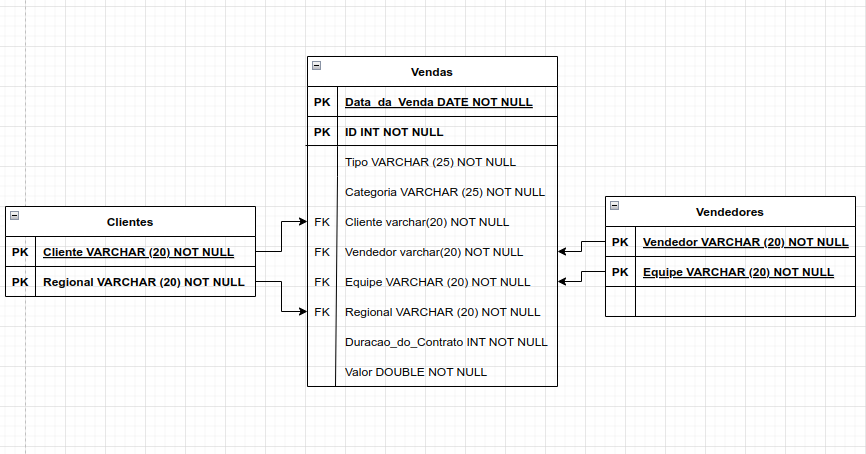

Para criar as tabelas foram utilizados os seguintes códigos SQL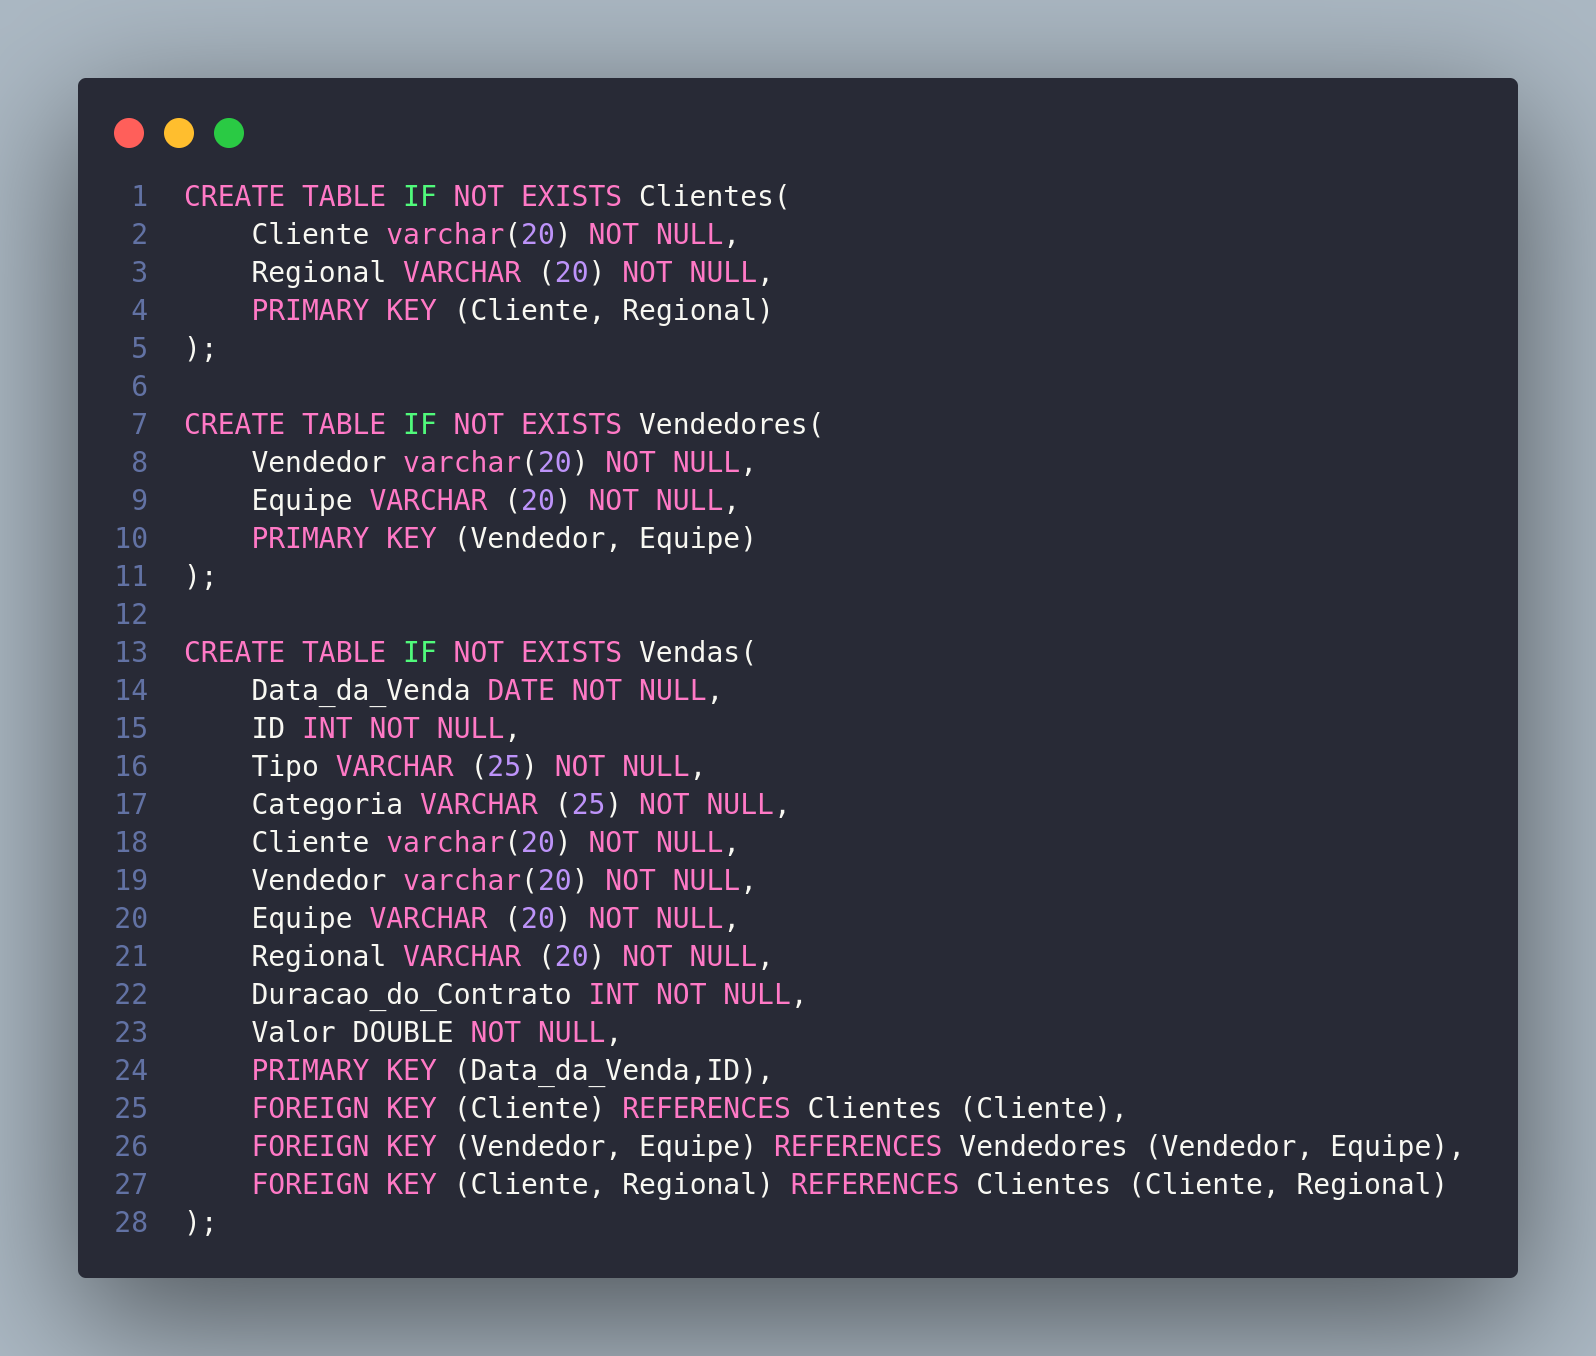

##2)Listar todas as vendas (ID) e seus respectivos clientes apenas no ano de 2020

com os dados inseridos no banco de dados, utilizei, no terminal linux os seguintes comandos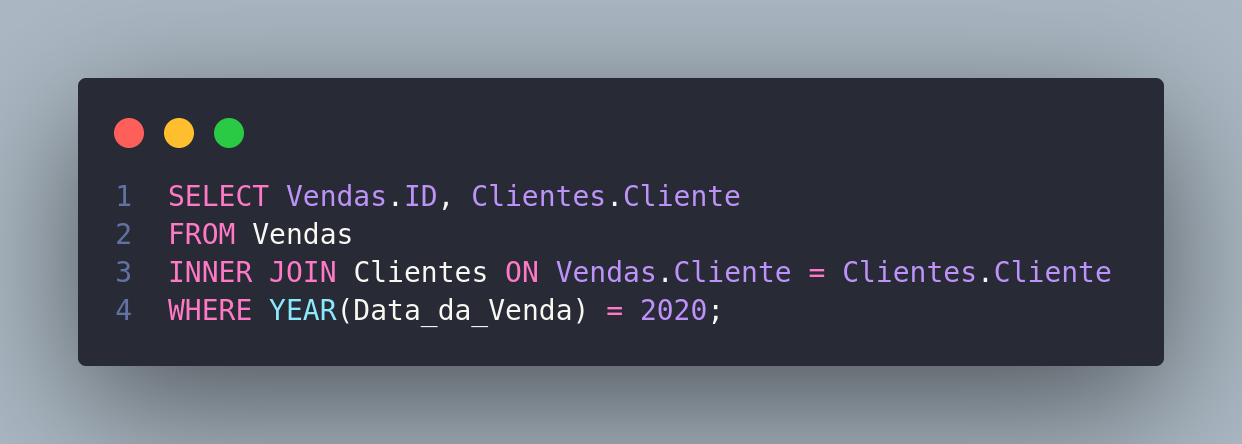

####Aqui está a demonstração aplicada ao banco de dados desse desafio

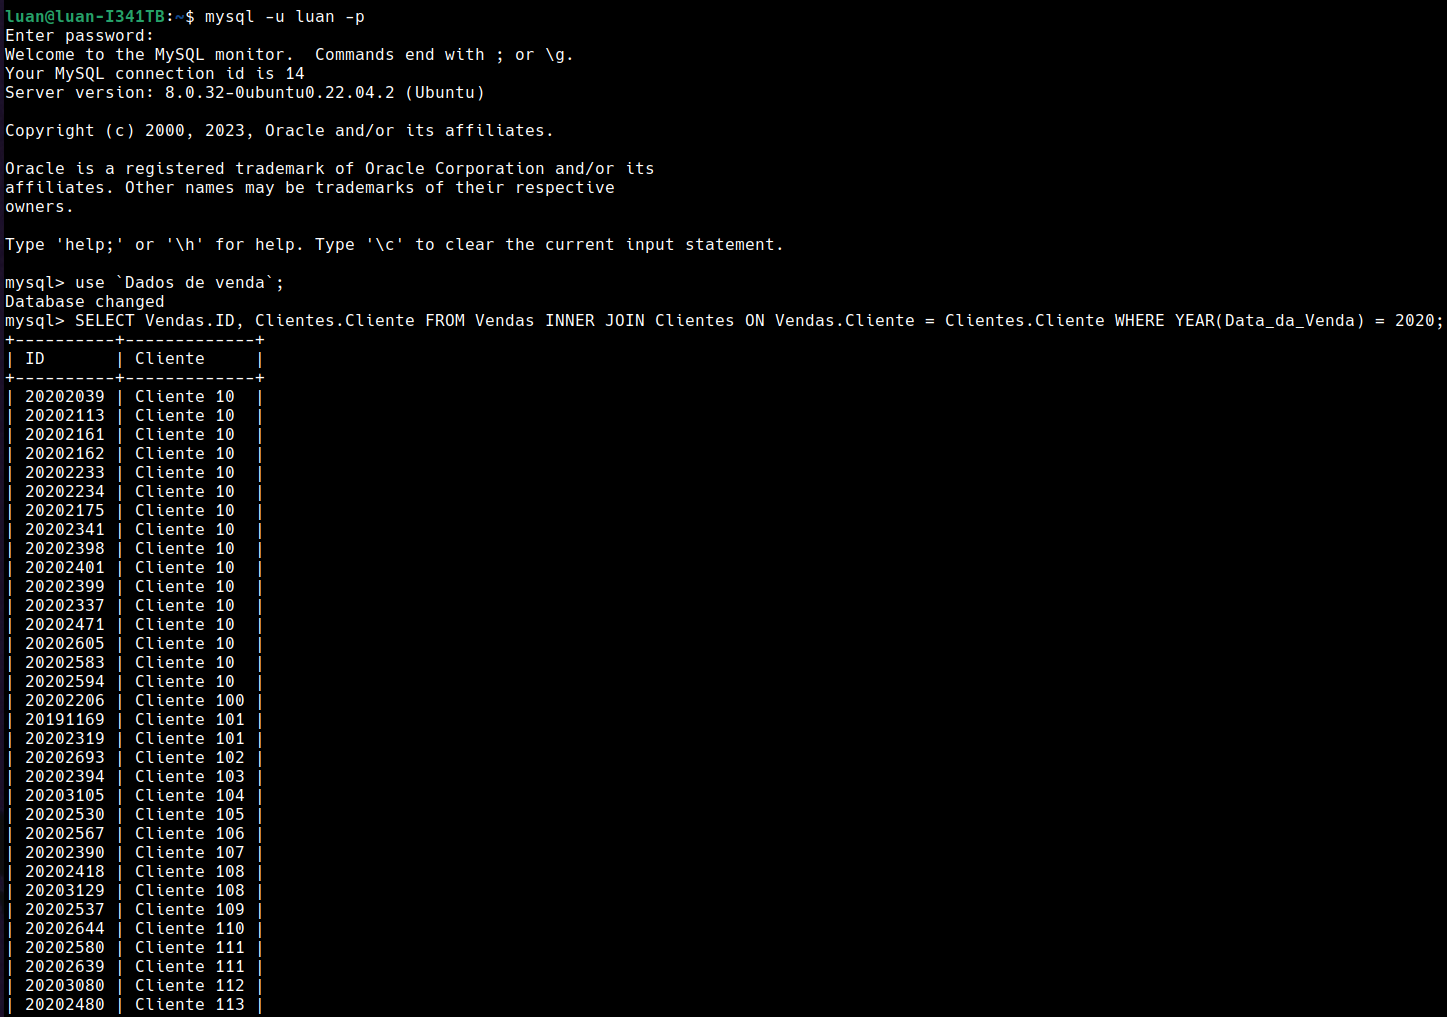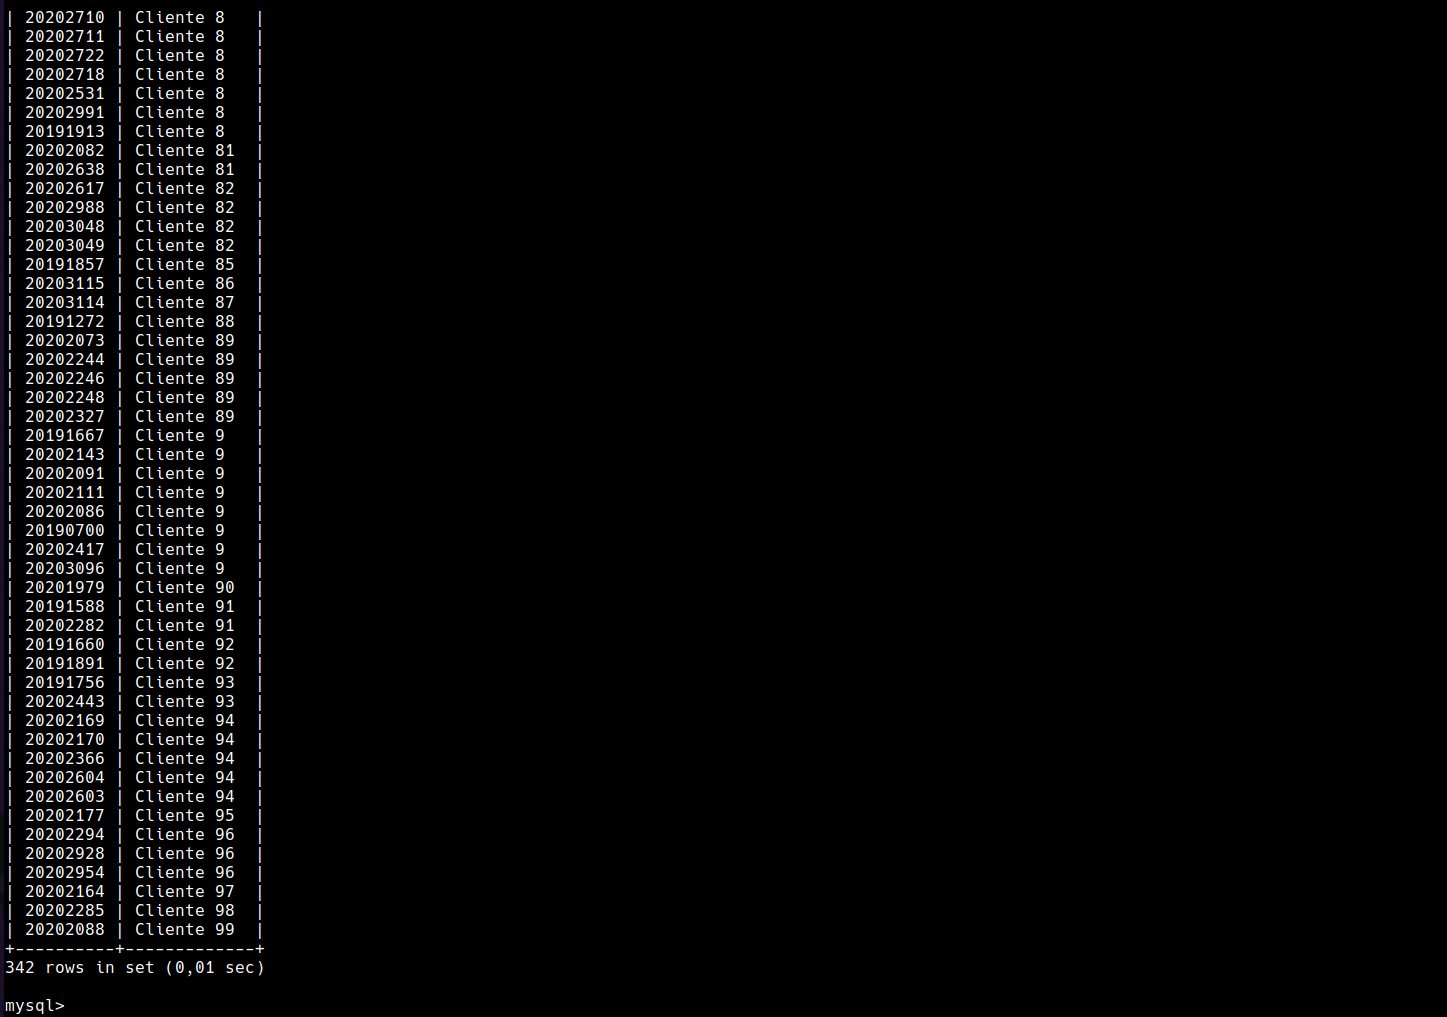

##3)Listar a equipe de cada vendedor

Esse foi mais simples levando em consideração o relacionamento das tabelas

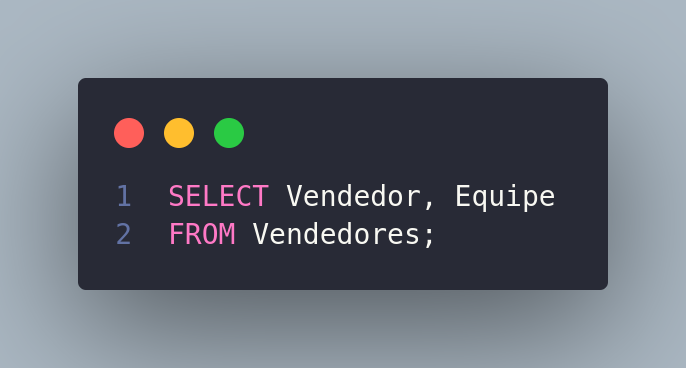

Aplicando os comando no nosso banco de dados...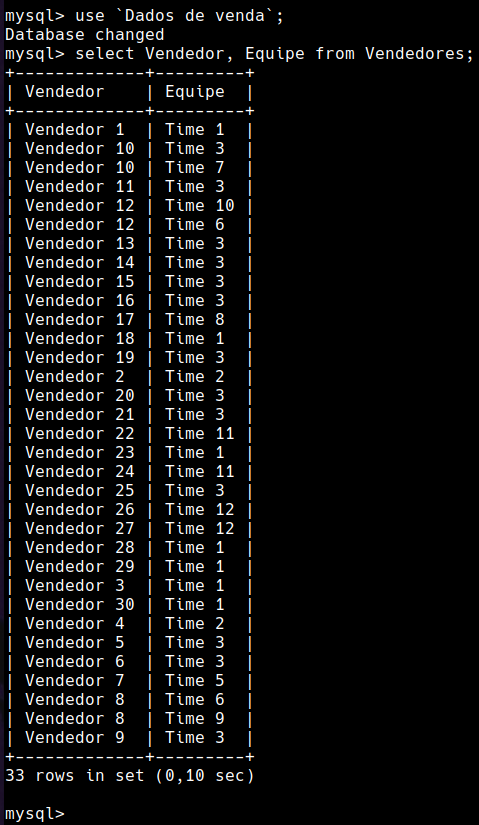

###4)Construir uma tabela que avalia trimestralmente o resultado de vendas e plote um gráfico deste histórico.

Para isso criamos uma nova tabela em nosso banco de dados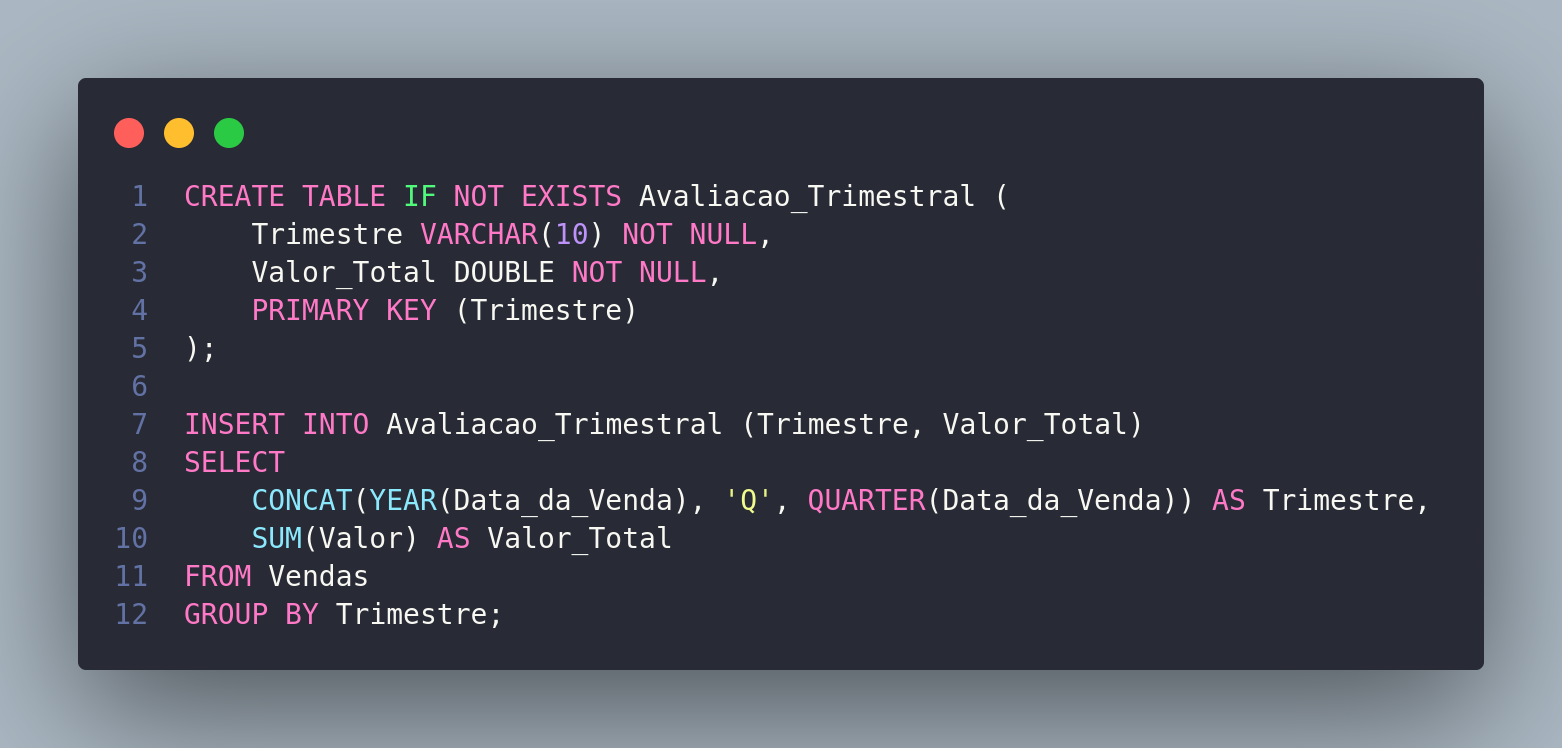

Na prática isso gerou

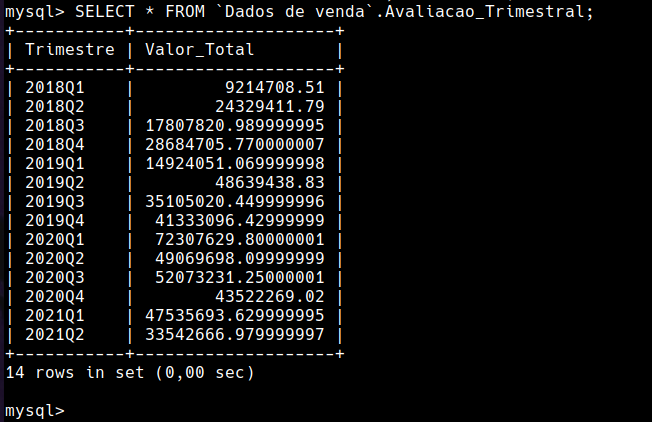

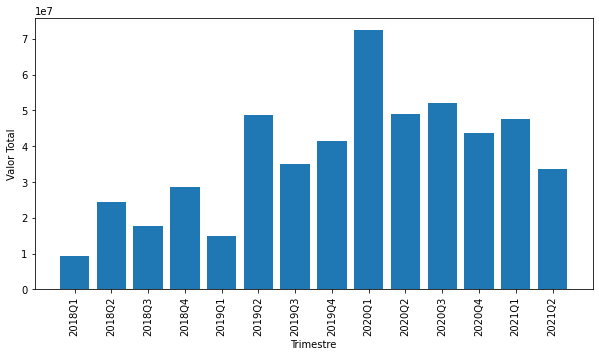

In [10]:
import matplotlib.pyplot as plt


# Ler o arquivo CSV
df = pd.read_csv('/content/drive/My Drive/Desafio_SQL/DB_Avaliacao_Trimestral.csv', delimiter=';')

# Configurar o tamanho do gráfico
plt.figure(figsize=(10, 5))

# Criar um gráfico de barras com os valores totais de cada trimestre
plt.bar(df['Trimestre'], df['Valor_Total'])

# Adicionar rótulos para o eixo x e y
plt.xlabel('Trimestre')
plt.ylabel('Valor Total')

# Alterar a orientação do eixo x para que os nomes fiquem na vertical
##Testei por os rotulos na horizontal mas os nomes ficaram ilegíveis, entao
###Optei por deixar o nome na vertical
plt.xticks(rotation=90)

# Exibir o gráfico
plt.show()

Por se tratar de gráficos cujo objetivo é visualizar desempenho por período de tempo, e por ser um grafico de apenas dois parâmetros, utilizei graficos de barras pois é mais confortável de se entender e mensurar diferenças entre as entidades medidas.